In [1]:
#Some test to exxtract stanford dataset
#!pip install dash-leaflet
#!pip install obspy
#!pip install dash-extensions
#!pip install librosa
#!pip install dash-bootstrap-components
#!pip install geopy

In [2]:
#Statistics layer: heatmap by geographic regions, heatmap by countries
# Global regions: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/CQWUBI

In [3]:
#!pip install dash-extensions==0.0.65

In [4]:
from map_helper_functions import *


df_events = pd.read_csv("csvs/earthquake_metadata.csv",low_memory=False)

df_events.set_index('trace_name',inplace= True)

In [5]:
provider_list = sorted(URL_MAPPINGS.keys())

In [6]:
df_events['time'] = pd.to_datetime(df_events['trace_start_time'], infer_datetime_format=True)
df_events['source_depth_km'] = pd.to_numeric(df_events['source_depth_km'],errors='coerce')
df_events['source_magnitude'] = pd.to_numeric(df_events['source_magnitude'],errors='coerce')

In [7]:
#stations_df = pd.read_csv('stations_duplicates_removed.csv')
stations_df = pd.read_csv('csvs/stations_definition.csv')
stations_df['station_opened'] =  pd.to_datetime(stations_df['station_opened'], infer_datetime_format=True)

#df_events
#stations_df = stations_df
#stations_df[
stations_df = stations_df[stations_df['station_id'].isin(stations)]
stations_df.to_csv('csvs/stations_definition.csv',index = False)

In [8]:
selected_event = df_events.loc['KAN08.GS_20150408005359_EV']

provider_of_waveform = stations_df[stations_df['station_id'] == selected_event['station_id']]

clien = provider_of_waveform['provider'].tolist()[0]

In [9]:
clien = Client(clien)
wave_test = extract_waveform(clien, selected_event)


In [10]:
def create_waveform_spectrogram_0(waveform):
    
    px = 1/plt.rcParams['figure.dpi']
    fig = plt.figure(figsize=(700*px, 500*px))
    subfigs = fig.subfigures(2, 1)
    
    #fig, ax = plt.subplots(2, 2, sharex=True)
    #print(type(ax[0,0]))
    #ax1 = fig.add_subplot(211)
    
    
    
    waveform.plot(fig = subfigs[0])
    #print(subfigs[0].subplots())
    ax2 = subfigs[1].add_subplot(111)
    
    #ax3 = subfigs[1].add_subplot(121)

    #plot spectrogram (bottom subfigure)    
    #fig = spl2
    waveform.filter("highpass", freq=0.5).spectrogram(show=False, axes=ax2)
    ax2.set_ylabel('Frequency [Hz]')
    ax2.set_xlabel('Time [sec]')
    mappable = ax2.images[0]
    subfigs[1].colorbar(mappable=mappable)
    
    #plt.colorbar(mappable=mappable, cax=ax3)


px = 1/plt.rcParams['figure.dpi']
fig_specgram = plt.figure(figsize=(800*px, 300*px))
f, t, Sxx,e = plt.specgram(x = wave_test.filter("highpass", freq=0.5).data, Fs = wave_test.stats.sampling_rate,scale = 'dB',cmap = 'viridis')
fig_specgram.colorbar(e)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [139]:
def create_waveform_spectrogram_1(waveform):
    px = 1/plt.rcParams['figure.dpi']
    #wf = fig_to_uri(waveform)


    fig = plt.figure(figsize=(800*px, 500*px))
    #ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.5]) #[left bottom width height]
    #ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60])
    #ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])
    ax1 = plt.subplot(211) #[left bottom width height]
    #ax1.imshow(plt.imread(wf))
    #ax1.axis('off')
    
    #ax3 = fig.add_subplot(221)

    #make time vector
    t = np.arange(waveform.stats.npts) / waveform.stats.sampling_rate
    time_split = np.arange(np.datetime64(waveform.stats['starttime']), np.datetime64(waveform.stats['endtime']), timedelta(seconds=10)).astype(datetime)
    print(len(time_split))
    #print(t)
    #print(len(t))

    #plot waveform (top subfigure)    
    ax1.plot(t, waveform.data, 'k')
    ax1.set_xticks(np.arange(0,60)[::10])
    ax1.set_xticklabels(time_split)
    #ax1.plot(waveform.data)
    ax2 = plt.subplot(212)
    #plot spectrogram (bottom subfigure)
    #spl2 = waveform[0]
    #fig = waveform.spectrogram(show=False, axes=ax2)
    #f, t, Sxx,e = plt.specgram(x = waveform.filter("highpass", freq=0.5).data, Fs = waveform.stats.sampling_rate,scale = 'dB',cmap = 'viridis')
    f, t, Sxx,e = ax2.specgram(x = waveform.filter("highpass", freq=0.5).data, Fs = waveform.stats.sampling_rate,scale = 'dB',cmap = 'viridis')
    ax2.set_xlabel('Time [sec]')
    ax2.set_ylabel('Frequency [Hz]')
    ax2.set_title('')
    ax2.set_xticks(np.arange(0,60)[::10])
    ax2.set_xticklabels(time_split)
    #mappable = ax2.images[0]
    #ax3 = plt.subplot(222)
    plt.colorbar(e, ax=ax2,label = 'Amplitude (dB)')
    #ax2.set_ylabel()
    #ax3.colorbar(e)
    plt.show()
    
    #plt.tight_layout()

6


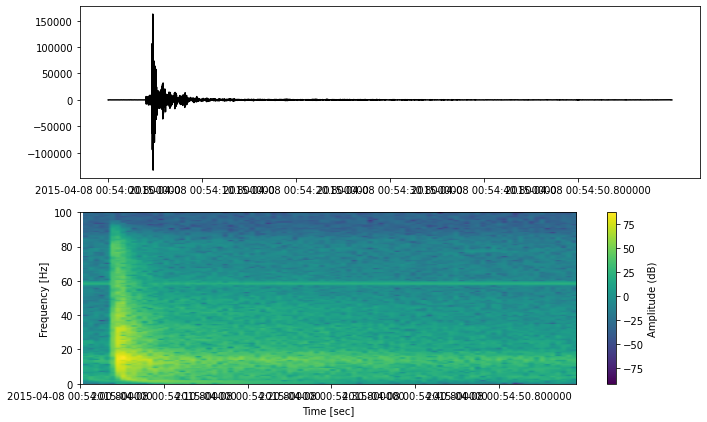

In [141]:
create_waveform_spectrogram_1(wave_test)

In [102]:
from datetime import datetime, timedelta



array([ 0, 10, 20, 30, 40, 50, 60])

In [100]:
wave_test.stats
np.datetime64(wave_test.stats['starttime'])

numpy.datetime64('2015-04-08T00:54:00.800000')

create_waveform_spectrogram_1(wave_test)

In [12]:
o_file = create_seismic_sound_to_dash_bytes(wave_test)
spectrogram_plot = spectrogram_to_uri(wave_test)

base_seismogram = fig_to_uri(wave_test)

Extract the minimum depth, magnitude, recording times etcc

In [13]:
#Latitudes and longitudes
site_lat = df_events.source_latitude
site_lon = df_events.source_longitude
hover_desc = 'Timestamp: ' +  str(df_events.time) + '<br>Category: ' + df_events.trace_category

#min timestamp
#Extract timestamp range
min_date = min(df_events['time']).date()
max_date = max(df_events['time']).date()
#Extract minimum and maximum depth
min_depth = min(df_events['source_depth_km'])
max_depth = max(df_events['source_depth_km'])
#Extract minimum and maximum magnitude
min_magnitude = min(df_events['source_magnitude'])
max_magnitude = max(df_events['source_magnitude'])

depth_space = np.linspace(start=min_depth,stop=max_depth,num=8,endpoint=True,dtype=np.float64)
magnitude_space = np.linspace(start=min_magnitude,stop=max_magnitude,num=8,endpoint=True,dtype=np.float64)

In [14]:
provider_list = stations_df['provider'].value_counts().index.tolist()

In [15]:
stations_geojson = stations_df_to_geojson(stations_df)

In [16]:
data_points_geojson = dataframe_to_geojson(df_events) 

In [17]:
import dash_leaflet as dl
from dash import Dash, html, dcc, Output, Input
from dash_extensions.javascript import assign
import dash_bootstrap_components as dbc
from dash import dash_table

import dash
from dash import dcc
from dash import html

from dash.dependencies import Input,Output,State
from dash import callback_context
import dash_leaflet as dl
from dash_extensions.javascript import assign


colorscale = ['red', 'yellow', 'green', 'blue', 'purple']  # rainbow
chroma = "https://cdnjs.cloudflare.com/ajax/libs/chroma-js/2.1.0/chroma.min.js"  # js lib used for colors
color_prop = 'source_magnitude'
colorbar = dl.Colorbar(colorscale=colorscale, width=20, height=150, min=min_magnitude, max=max_magnitude, unit='km')
detail_colorbar = dl.Colorbar(colorscale=colorscale, width=20, height=150,  unit='km', min=min_magnitude, max=max_magnitude, id = 'detail_map_colorbar')
# Geojson rendering logic, must be JavaScript as it is executed in clientside.
point_to_layer = assign("""function(feature, latlng, context){
    const {min, max, colorscale, circleOptions, colorProp} = context.props.hideout;
    const csc = chroma.scale(colorscale).domain([min, max]);  // chroma lib to construct colorscale
    circleOptions.fillColor = csc(feature.properties[colorProp]);  // set color based on color prop.
    return L.circleMarker(latlng, circleOptions);  // sender a simple circle marker.
}""")


#icons/antenna_img.png
# 
# `https://github.com/doromboziandras32/Interdisciplinary/blob/master/icons/antenna_img.png`
draw_antenna = assign("""function(feature, latlng){
const antenna = L.icon({iconUrl: `/static/antenna_img.png`, iconSize: [24,24]});
return L.marker(latlng, {icon: antenna});
}""")


draw_antenna_on_detail_map = assign("""function(feature, latlng){
const antenna = L.icon({iconUrl: `/static/antenna_img.png`, iconSize: [40,40]});
return L.marker(latlng, {icon: antenna});
}""")



#https://fonts.google.com/icons?selected=Material%20Icons%3Asettings_input_antenna%3A


#app = Dash(external_scripts=[chroma],external_stylesheets=[dbc.themes.BOOTSTRAP] ,prevent_initial_callbacks=True)
app = Dash(external_scripts=[chroma],external_stylesheets=[dbc.themes.MATERIA] ,prevent_initial_callbacks=True)

app.layout = html.Div([dbc.Row( id = 'filter-row', children = [#Filters|
                                html.Div(style={'marginLeft': 5,'display':'block','vertical-align': 'top'},
                                         children = [
                                            html.Div(style={ 'display': 'inline-block','vertical-align':'top', 'width':'25%', 'marginRight': '2%'},
                                                     children = [
                                                        html.H6('Providers',style = {'text-align': 'center'}),                                                     
                                                    #Datepicker to filter for intervals
                                                         dcc.Dropdown(id='provider-selector', 
                                                            options=[{'label': i, 'value': i} for i in provider_list],
                                                            multi=True, 
                                                            value = provider_list,
                                                            style={},
                                                            className='stockselector',
                                                            clearable=False,
                                                            placeholder = 'Select providers..',
                                                            
                                                            )]), 
                                            html.Div(style={ 'display': 'inline-block','vertical-align':'top', 'width':'20%', 'marginRight': '2%','text-align': 'center'},
                                                     children = [
                                                        html.H6('Date interval'),
                                                    #Datepicker to filter for intervals
                                                        dcc.DatePickerRange(
                                                            id='date-filter',
                                                            min_date_allowed=min_date,
                                                            max_date_allowed=max_date,
                                                            initial_visible_month=min_date,
                                                            start_date=min_date,
                                                            end_date=max_date
                                                        )]),
                                            html.Div(
                                                style={ 'display': 'inline-block','vertical-align':'top', 'width':'20%', 'marginRight': '2%','text-align': 'center'},                                                
                                                children = [
                                                html.H6('Earthquake depth interval (in km)'),
                                                #slider to filter for depth
                                                dcc.RangeSlider(min = min_depth, max = max_depth,
                                                                id='depth-slider',
                                                                marks={i: '{:.2f}'.format(i) for i in depth_space},
                                                                value=[min_depth, max_depth],
                                                                dots=False,
                                                                #step=
                                                                step=0.01,
                                                                updatemode='drag',
                                                                tooltip={"placement": "bottom", "always_visible": False}
                                            )]),
                                            html.Div(
                                                style={ 'display': 'inline-block','vertical-align':'top', 'width':'20%','text-align': 'center'},
                                                children = [
                                                html.H6('Earthquake magnitude interval (in km)'),
                                                #slider to filter for magnitudes
                                                dcc.RangeSlider(min = min_magnitude, max = max_magnitude,
                                                                id='magnitude-slider',
                                                                marks={i: '{:.2f}'.format(i) for i in magnitude_space},
                                                                value=[min_magnitude, max_magnitude],
                                                                dots=False,
                                                                step=0.01,
                                                                updatemode='drag',
                                                                tooltip={"placement": "bottom", "always_visible": False}
                                                                ),
                                                ])]),
                                             html.Div(
                                                  style={'display': 'block','text-align': 'center'},
                                                 children = [                                                      
                                                             dbc.Button('Apply Filters', id='filter-apply-btn', n_clicks=0, color = 'primary'),
                                                             dbc.Button('Reset Filters', id='filter-reset-btn', n_clicks=0, color = 'secondary')
                                                             ]
                                             )
                                         ]),
                        dbc.Row( id = 'map-row',
                                children =  [                          
                                dbc.Modal( 
                                            [
                                            dbc.ModalHeader(
                                                dbc.ModalTitle("Warning"), close_button=True
                                            ),
                                            dbc.ModalBody(
                                                "This modal has no close button and can't be dismissed by "
                                                "pressing ESC. Try clicking on the backdrop or the below "
                                                "close button.",
                                                id="event-no-match-alert"
                                            )
                                            ],
                                            id = "event-no-match-modal",
                                            is_open = False,
                                            centered=True
                                        ),
                                html.Div( 
                                        style={'width':'98%', 'marginRight': 0.8,'display':'inline-block',"border":"2px black solid"},                                                                                
                                        children = [dcc.RadioItems(options=[{
                                                                    'value':'simple','label': 'Simple-event view'},
                                                                    {'value':'multi', 'label': 'Event-Compare view'                                                            
                                                                    }],
                                                                    value='simple', id ='view-selector-radio',labelStyle={'display': 'inline-block',
                                                                                                                            'margin-left': '7px'}
                                                    )
                                            ,dl.Map(children=[
                                                    dl.TileLayer(),
                                                    dl.GeoJSON(data = data_points_geojson,
                                                    options=dict(pointToLayer=point_to_layer),  # how to draw points            
                                                    hideout=dict(colorProp=color_prop, circleOptions=dict(fillOpacity=1, stroke=False, radius=10),
                                                    min=min_magnitude, max=max_magnitude, colorscale=colorscale),                                                    
                                                    cluster=True , zoomToBoundsOnClick=True,
                                                    superClusterOptions={"radius": 100},
                                                    
                                                    id ='earthquake_events_geojson'),
                                                    dl.GeoJSON(data=stations_geojson
                                                                , options=dict(pointToLayer=draw_antenna), zoomToBounds=True,
                                                                clusterToLayer=draw_antenna,
                                                                cluster=True ,  # how to draw clusters
                                                                zoomToBoundsOnClick=True,
                                                                superClusterOptions=dict(radius=150),
                                                                id= 'stations_geojson')  # when true, zooms to bounds of feature (e.g. cluster) on click)
                                                    ,colorbar                                                                
                                                ],
                                                 style={'width': '65%', 'height': '50vh', "display": "inline-block","border-right":"5px black solid"}, id="map"),
                                                 dl.Map(children=[
                                                    dl.TileLayer(),
                                                    dl.GeoJSON(
                                                                options=dict(pointToLayer=point_to_layer),  # how to draw points            
                                                                hideout=dict(colorProp=color_prop, circleOptions=dict(fillOpacity=1, stroke=False, radius=15),
                                                                min=min_magnitude, max=max_magnitude, colorscale=colorscale), 
                                                                zoomToBoundsOnClick=True,
                                                                zoomToBounds=True,                                              
                                                                id ='detail_map_earthquake_geojson'),
                                                    dl.GeoJSON( options=dict(pointToLayer=draw_antenna_on_detail_map),                                                                
                                                                  # how to draw clusters
                                                                zoomToBoundsOnClick=True,        
                                                                id= 'detail_map_stations_geojson'),                                                    
                                                    detail_colorbar
                                                 ]
                                                 ,
                                                 style={'width': '35%', 'height': '50vh', "display": "inline-block"}, id="detail_map",maxZoom = 20)
                                                 ]

                                )]),
                        dbc.Row(id = 'simple-view-row',style = {'display': 'inline-block'},children=html.Div([
                    #Audio player
                                html.Div(                                    
                                        style={'marginBottom': 5, 'marginRight': 5,"border":"2px black solid",'display': 'inline-block', 'vertical-align': 'top','width':'600px'},                          
                                    children = [
                                                
                                                html.Audio(html.Source(src=f'/assets/test_raw_waveform_normalized_upsampled.wav',type='audio/wav'), controls=True, id = 'audio_player_main'),                                          
                                                    dash_table.DataTable(id = 'event_info_table',style_header={'display':'none'}
                                                    ,style_cell={"whiteSpace": "pre-line"}                                                
                                                    ,data = create_event_infos(df_events,'KAN08.GS_20150408005359_EV')
                                                    ,style_cell_conditional=[
                                                        {'if': {'column_id': 'index'},
                                                        'width': '20%'},
                                                        {'if': {'column_id': '0'},
                                                        'width': '80%'},
                                                    ]
                                                    ,columns=[{"name": i, "id": i} for i in ['index','0']])
                                #)
                                ]),                         
                                html.Div(style={'marginBottom': 5, 'marginRight': 5,"border":"2px black solid",'display': 'inline-block', 'vertical-align': 'top'},                         
                                        children = [
                                                    html.Div(style={ 'display': 'block','vertical-align':'middle'}, id = 'seismogram-div',
                                                    children = [html.Img(id ='seismogram_img'
                                                    , src = base_seismogram
                                                    )]),                                        
                                                    html.Div(style={ 'display': 'block','vertical-align':'middle'}, id = 'spectrogram-div',
                                                    children = [html.Img( id ='spectrogram_img'
                                                    ,src = spectrogram_plot
                                                    )])
                                                    ])])
                                ),
                        dbc.Row(id = 'multi-view-row',style = { 'display': 'none'},
                                children = [html.Div(html.Button('Clear selection', id='clear-compare-view', n_clicks=0),style={'vertical-align': 'top'})]
                                )])



@app.callback(
    Output(component_id='depth-slider', component_property= 'value'),
    Output(component_id='magnitude-slider', component_property= 'value'),
    Output(component_id='date-filter', component_property= 'start_date'),
    Output(component_id='date-filter', component_property= 'end_date'),
    Output(component_id='earthquake_events_geojson', component_property= 'data'),
    Output(component_id='stations_geojson', component_property= 'data'),
    Output(component_id='map', component_property= 'style'),
    Output(component_id='provider-selector', component_property= 'value'),
    
    Input(component_id='filter-apply-btn', component_property='n_clicks'), #Input button triggers the callback
    Input(component_id='filter-reset-btn', component_property='n_clicks'), #Input button triggers the callback
    State(component_id='depth-slider', component_property= 'value'),
    State(component_id='magnitude-slider', component_property= 'value'),
    State(component_id='date-filter', component_property= 'start_date'),
    State(component_id='date-filter', component_property= 'end_date'),
    State(component_id='provider-selector', component_property= 'value')    
)

def apply_filter(apply_click,reset_click, depth_value, magnitude_value,start_date,end_date, selected_providers):

    style_to_refresh={'width': '70%', 'height': '50vh', 'margin': "auto", "display": "inline-block"}
    
    # https://towardsdatascience.com/multi-faceted-data-exploration-in-the-browser-using-leaflet-and-amcharts-f74d049d78d9
    ctx = dash.callback_context
    clicked_element = ctx.triggered[0]['prop_id'].split('.')[0]
    if  clicked_element == 'filter-apply-btn':
        
        provider_filter = stations_df[(stations_df['provider'].isin(selected_providers)) & (stations_df['station_opened'] >= pd.to_datetime(start_date))]


        filtered_stations = list(set(provider_filter['station_id']))
        filter_records = df_events['time'].between(pd.to_datetime(start_date),pd.to_datetime(end_date)) & df_events['source_magnitude'].between(magnitude_value[0],magnitude_value[1])\
                         & df_events['source_depth_km'].between(depth_value[0],depth_value[1]) & df_events['station_id'].isin(filtered_stations)
        df_filtered = df_events[filter_records]

        filtered_datapoints_geojson = dataframe_to_geojson(df_filtered)
        filtered_stations_geojson = stations_df_to_geojson(provider_filter)
        

        return [depth_value,magnitude_value,start_date,end_date,filtered_datapoints_geojson,filtered_stations_geojson,style_to_refresh,selected_providers]

    elif clicked_element == 'filter-reset-btn':
        return [[min_depth,max_depth],[min_magnitude,max_magnitude],min_date,max_date,data_points_geojson,stations_geojson,style_to_refresh,provider_list]

    else:
        return dash.no_update


@app.callback(
    Output(component_id='simple-view-row', component_property= 'style'),
    Output(component_id='multi-view-row', component_property= 'style'),
    Input(component_id='view-selector-radio', component_property= 'value')
)

def switch_view(button_value):
    show_div = {'display': 'inline-block'}
    hide_div = {'display': 'none'}
    if button_value == 'simple':
        simple_view_div_style = show_div
        multi_view_div_style = hide_div

    elif button_value == 'multi':
        simple_view_div_style = hide_div 
        multi_view_div_style = show_div

    return [simple_view_div_style,multi_view_div_style]
        

@app.callback(Output("event_info_table", "data"),
            Output('seismogram_img', 'src'),
            Output('spectrogram_img', 'src'), 
            Output('audio_player_main', 'src'),
            Output('audio_player_main', 'style'),
            Output('multi-view-row', 'children'),            
            Output(component_id="event-no-match-alert", component_property= 'children'),
            Output(component_id="event-no-match-modal", component_property= 'is_open'),    

        
            Input("earthquake_events_geojson", "click_feature"),
            Input("detail_map_earthquake_geojson", "click_feature"),
            Input('clear-compare-view', 'n_clicks'),
            State("event_info_table", "data"),
            State('seismogram_img', 'src'),
            State('spectrogram_img', 'src'),
            State('audio_player_main', 'src'),
            State('audio_player_main', 'style'),

            State(component_id='view-selector-radio', component_property= 'value'),
            State('multi-view-row', 'children'),
            State(component_id="event-no-match-alert", component_property= 'children')
)

def select_event(clicked_event,clicked_detail_event,click_compare_button,current_event_table ,current_seismogram_image, current_spectrogram_image,current_audio_src,audio_div_element,current_view, div_multi_row_elements, current_alert_msg):

    ctx = dash.callback_context
    clicked_element = ctx.triggered[0]['prop_id'].split('.')[0]
    alert_state = False
    audio_player_style = {}
    if clicked_element == "earthquake_events_geojson":
        if ctx.triggered[0]['value'] is not None:
            if ctx.triggered[0]['value']['properties']['cluster'] is True:
                return dash.no_update
            else:
                clicked_event = ctx.triggered[0]['value']
    
    if clicked_element == "detail_map_earthquake_geojson":
        clicked_event = ctx.triggered[0]['value']

    if clicked_element == 'clear-compare-view':  
        cleared_elements = [html.Div(html.Button('Clear selection', id='clear-compare-view', n_clicks=0),style={'vertical-align': 'top'})]
        
        
        return [current_event_table ,current_seismogram_image, current_spectrogram_image,current_audio_src,audio_div_element,cleared_elements, current_alert_msg, alert_state]

    if clicked_event is not None:
        selected_trace_name = clicked_event['properties']['trace_name']
        table_data = create_event_infos(df_events,selected_trace_name)
        selected_event = df_events.loc[selected_trace_name]

                
        provider_of_waveform = stations_df[stations_df['station_id'] == selected_event['station_id']]        
        
        try:
            client = Client(provider_of_waveform['provider'].tolist()[0])

            
            wave = extract_waveform(client, selected_event)

            spectrogram_plot = spectrogram_to_uri(wave)

            seismic_plot = fig_to_uri(wave)

            
            audio_src = html.Source(src=create_seismic_sound_to_dash_bytes(wave),type='audio/wav')
            audio_src = create_seismic_sound_to_dash_bytes(wave)
                                                

        except:            
            current_alert_msg =  f"Event {selected_trace_name} does not have corresponding seismic sound and image"
            alert_state = True

            seismic_plot = current_seismogram_image
            spectrogram_plot = current_spectrogram_image
            table_data = current_event_table
            audio_src = current_audio_src
            audio_player_style = audio_div_element
            #print('data cannot be found')
            #return dash.no_update
        if current_view == 'simple':
        #return [table_data,seismic_plot,spectrogram_plot,audio_src,audio_player_style,div_simple_row_style,div_multi_row_style,div_multi_row_elements]
            return [table_data,seismic_plot,spectrogram_plot,audio_src,audio_player_style,div_multi_row_elements, current_alert_msg, alert_state]

        elif current_view == 'multi':
            if len(div_multi_row_elements) < 5:
                 
                
                if alert_state is False:
                #new_div = html.Div(style={'marginLeft': 5,'marginTop': 5, 'marginRight': 5,"border":"2px black solid",'display': 'inline-block', 'vertical-align': 'left'},
                    new_div = html.Div(style={'marginBottom': 5, 'marginRight': 5,"border":"2px black solid",'display': 'inline-block', 'vertical-align': 'left','width':'600px'},
                                        children = [
                                            html.Div(
                                                    style={'display': 'block','vertical-align':'left'}, 
                                                    children = html.Audio(src = audio_src, controls=True)),

                                            html.Div(
                                                    style={'display': 'block','vertical-align':'left'}, 
                                                    children = html.Img( src = seismic_plot)),
                                            html.Div(
                                                    style={'display': 'block','vertical-align':'left', 'marginBottom' : 10}, 
                                                    children = html.Img( src = spectrogram_plot)),
                                        
                                            html.Div(
                                                    style={'display': 'block','vertical-align':'left','width':'500px'},
                                                    children =   dash_table.DataTable(style_header={'display':'none'}
                                                ,style_cell={"whiteSpace": "pre-line"}                                      
                                                ,data = table_data
                                                ,style_cell_conditional=[
                                                    {'if': {'column_id': 'index'},
                                                    'width': '20%'},
                                                    {'if': {'column_id': '0'},
                                                    'width': '80%'},
                                                ]
                                                ,columns=[{"name": i, "id": i} for i in ['index','0']]) 
                                        )])
                                        
                                    
                    div_multi_row_elements.append(new_div)           


                return [table_data,seismic_plot,spectrogram_plot,audio_src,audio_player_style,div_multi_row_elements, current_alert_msg, alert_state]
            #TODO:currently just no update, but some warning dialog will be implemented later
            else:
                return dash.no_update

         
    else:
        return dash.no_update





@app.callback(
 # how to draw points      
Output(component_id='detail_map_earthquake_geojson', component_property= 'hideout'),
Output(component_id='detail_map_earthquake_geojson', component_property= 'data'),
Output(component_id='detail_map_stations_geojson', component_property= 'data'),
Output(component_id='detail_map', component_property= 'style'),
Output(component_id='detail_map_colorbar', component_property= 'min'),
Output(component_id='detail_map_colorbar', component_property= 'max'),
Output(component_id='detail_map_colorbar', component_property= 'style'),
Input(component_id="stations_geojson",component_property=  "click_feature"),
Input(component_id='filter-apply-btn', component_property='n_clicks'), #Input button triggers the callback
Input(component_id='filter-reset-btn', component_property='n_clicks'), #Input button triggers the callback
State(component_id='depth-slider', component_property= 'value'),
State(component_id='magnitude-slider', component_property= 'value'),
State(component_id='date-filter', component_property= 'start_date'),
State(component_id='date-filter', component_property= 'end_date'),
State(component_id='provider-selector', component_property= 'value') ,
State(component_id='stations_geojson', component_property= 'click_feature'),

)

def show_detail_event(clicked_event, apply_click,reset_click, depth_value, magnitude_value,start_date,end_date, selected_providers,last_selected_station):

    style_to_refresh={'width': '30%', 'height': '50vh', 'margin': "auto", "display": "inline-block"}

    ctx = dash.callback_context
    clicked_element = ctx.triggered[0]['prop_id'].split('.')[0]
    if  clicked_element == 'filter-apply-btn':
        print(last_selected_station)
        if last_selected_station is not None and last_selected_station['properties']['cluster'] is False:
            
            selected_station_id = last_selected_station['properties']['station_id']           
        
            station_record = stations_df[stations_df['station_id'] == selected_station_id]         
            filter_records = df_events['time'].between(pd.to_datetime(start_date),pd.to_datetime(end_date)) & df_events['source_magnitude'].between(magnitude_value[0],magnitude_value[1])\
                         & df_events['source_depth_km'].between(depth_value[0],depth_value[1]) & (df_events['station_id'] == selected_station_id)


            df_detail_map_filter  = df_events[filter_records]
            try:                
                
                filtered_data_points_min_magnitude = min(df_detail_map_filter['source_magnitude'])                
                filtered_data_points_max_magnitude = max(df_detail_map_filter['source_magnitude'])

                if filtered_data_points_min_magnitude == filtered_data_points_max_magnitude:
                    filtered_data_points_max_magnitude = max_magnitude
            except:
                filtered_data_points_min_magnitude = min_magnitude
                filtered_data_points_max_magnitude = max_magnitude

            
            hideout_update = dict(colorProp=color_prop, circleOptions=dict(fillOpacity=1, stroke=False, radius=10),
                                                        min=filtered_data_points_min_magnitude, max=filtered_data_points_max_magnitude, colorscale=colorscale)

            filtered_datapoints_geojson = dataframe_to_geojson(df_detail_map_filter)
            if len(filtered_datapoints_geojson) == 0:
                filtered_datapoints_geojson = None

            filtered_stations_geojson = stations_df_to_geojson(station_record)
                                    


            return [hideout_update,filtered_datapoints_geojson,filtered_stations_geojson,style_to_refresh,filtered_data_points_min_magnitude,filtered_data_points_max_magnitude,dict()]


        else:
            filtered_data_points_min_magnitude = min_magnitude
            filtered_data_points_max_magnitude = max_magnitude
            hideout_update = dict(colorProp=color_prop, circleOptions=dict(fillOpacity=1, stroke=False, radius=10),
                                            min=filtered_data_points_min_magnitude, max=filtered_data_points_max_magnitude, colorscale=colorscale)
        
            return [hideout_update,None,None,style_to_refresh,filtered_data_points_min_magnitude,filtered_data_points_max_magnitude,dict()]
            
    elif clicked_element == 'filter-reset-btn':

            filtered_data_points_min_magnitude = min_magnitude
            filtered_data_points_max_magnitude = max_magnitude
            hideout_update = dict(colorProp=color_prop, circleOptions=dict(fillOpacity=1, stroke=False, radius=10),
                                            min=filtered_data_points_min_magnitude, max=filtered_data_points_max_magnitude, colorscale=colorscale)
        
            return [hideout_update,None,None,style_to_refresh,filtered_data_points_min_magnitude,filtered_data_points_max_magnitude,dict()]
    
    elif clicked_element == 'stations_geojson':        
        
        if clicked_event is not None and clicked_event['properties']['cluster'] is False:
            style_to_refresh={'width': '30%', 'height': '50vh', 'margin': "auto", "display": "inline-block"}
            selected_station_id = clicked_event['properties']['station_id']
            station_record = stations_df[stations_df['station_id'] == selected_station_id]

            #Refresh color property as well, maybe the scales and differences would be shown in more details
            

            filter_records = df_events['time'].between(pd.to_datetime(start_date),pd.to_datetime(end_date)) & df_events['source_magnitude'].between(magnitude_value[0],magnitude_value[1])\
                            & df_events['source_depth_km'].between(depth_value[0],depth_value[1]) & (df_events['station_id'] == selected_station_id)            
            df_detail_map_filter = df_events[filter_records]            
            try:                                
                filtered_data_points_min_magnitude = min(df_detail_map_filter['source_magnitude'])                
                filtered_data_points_max_magnitude = max(df_detail_map_filter['source_magnitude'])

                if filtered_data_points_min_magnitude == filtered_data_points_max_magnitude:
                    filtered_data_points_max_magnitude = max_magnitude
            except:
                filtered_data_points_min_magnitude = min_magnitude
                filtered_data_points_max_magnitude = max_magnitude

            hideout_update = dict(colorProp=color_prop, circleOptions=dict(fillOpacity=1, stroke=False, radius=10),
                                                        min=filtered_data_points_min_magnitude, max=filtered_data_points_max_magnitude, colorscale=colorscale)

            filtered_datapoints_geojson = dataframe_to_geojson(df_detail_map_filter)
            if len(filtered_datapoints_geojson) == 0:
                filtered_datapoints_geojson = None
            filtered_stations_geojson = stations_df_to_geojson(station_record)        

            return [hideout_update,filtered_datapoints_geojson,filtered_stations_geojson,style_to_refresh,filtered_data_points_min_magnitude,filtered_data_points_max_magnitude,dict()]

        else:
            return dash.no_update


if __name__ == '__main__':
    #app.run_server()
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
